# Katrina Tang

## Research question/interests

**My part of the project will be looking further into the correlation between demographic, specifically age and its correlation to housing affordability.**

### I changed my research question to just focus on age demographic instead of both gender and age.

I will be analyzing the correlation with age ranges of 20-39, 40-59 and then 60-79 will be analyzed with respect to housing affordability.
I will be visualizing housing affordability by comparing the cost of homes to the demographics of home owners. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid', font_scale=2)

DailyInterestRate = pd.read_csv("../data/raw/DailyInterestRates/DailyInterestRates.csv")
NewHousingPIndex = pd.read_csv("../data/raw/NewHousingPIndex/NewHousingPIndex.csv")
NewInventory = pd.read_csv("../data/raw/NewInventory/NewInventory.csv", low_memory = False)
PE_Wrangled = pd.read_csv("../data/processed/PE_Wrangled_Final.csv")

In [2]:
NewHousingPIndex.info()
NewHousingPIndex.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60480 entries, 0 to 60479
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REF_DATE                   60480 non-null  object 
 1   GEO                        60480 non-null  object 
 2   DGUID                      58968 non-null  object 
 3   New housing price indexes  60480 non-null  object 
 4   UOM                        60480 non-null  object 
 5   UOM_ID                     60480 non-null  int64  
 6   SCALAR_FACTOR              60480 non-null  object 
 7   SCALAR_ID                  60480 non-null  int64  
 8   VECTOR                     60480 non-null  object 
 9   COORDINATE                 60480 non-null  float64
 10  VALUE                      49654 non-null  float64
 11  STATUS                     27644 non-null  object 
 12  SYMBOL                     0 non-null      float64
 13  TERMINATED                 0 non-null      flo

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1981-01,Canada,2016A000011124,Total (house and land),"Index, 201612=100",347,units,0,v111955442,1.1,38.2,NaN,NaN,NaN,1
1,1981-01,Canada,2016A000011124,House only,"Index, 201612=100",347,units,0,v111955443,1.2,36.1,NaN,NaN,NaN,1
2,1981-01,Canada,2016A000011124,Land only,"Index, 201612=100",347,units,0,v111955444,1.3,40.6,E,NaN,NaN,1
3,1981-01,Atlantic Region,2016A00011,Total (house and land),"Index, 201612=100",347,units,0,v111955445,2.1,NaN,..,NaN,NaN,1
4,1981-01,Atlantic Region,2016A00011,House only,"Index, 201612=100",347,units,0,v111955446,2.2,NaN,..,NaN,NaN,1
5,1981-01,Atlantic Region,2016A00011,Land only,"Index, 201612=100",347,units,0,v111955447,2.3,NaN,..,NaN,NaN,1
6,1981-01,Newfoundland and Labrador,2016A000210,Total (house and land),"Index, 201612=100",347,units,0,v111955448,3.1,NaN,..,NaN,NaN,1
7,1981-01,Newfoundland and Labrador,2016A000210,House only,"Index, 201612=100",347,units,0,v111955449,3.2,NaN,..,NaN,NaN,1
8,1981-01,Newfoundland and Labrador,2016A000210,Land only,"Index, 201612=100",347,units,0,v111955450,3.3,NaN,..,NaN,NaN,1
9,1981-01,"St. John's, Newfoundland and Labrador",2011S05031,Total (house and land),"Index, 201612=100",347,units,0,v111955451,4.1,36.1,NaN,NaN,NaN,1


In [3]:
PE_Wrangled.info()
PE_Wrangled.head(15)
PE_Wrangled.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174570 entries, 0 to 174569
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  174570 non-null  int64  
 1   REF_DATE    174570 non-null  object 
 2   GEO         174570 non-null  object 
 3   Sex         174570 non-null  object 
 4   Age group   174570 non-null  object 
 5   UOM         174570 non-null  object 
 6   VALUE       174570 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 9.3+ MB


,Unnamed: 0,REF_DATE,GEO,Sex,Age group,UOM,VALUE
11668,11668,2002-01-01,"Kitchener-Cambridge-Waterloo, Ontario",Females,43 years,Persons,3615.0
163471,163471,2021-01-01,"Windsor, Ontario",Females,45 years,Persons,2252.0
52378,52378,2007-01-01,"Windsor, Ontario",Females,43 years,Persons,2731.0
106386,106386,2014-01-01,"St. Catharines-Niagara, Ontario",Males,8 years,Persons,2012.0
36741,36741,2005-01-01,"Greater Sudbury, Ontario",Males,45 years,Persons,1406.0
67892,67892,2009-01-01,"London, Ontario",Females,34 years,Persons,3157.0
64394,64394,2009-01-01,"Québec, Quebec",Males,90 years and older,Persons,933.0
91564,91564,2012-01-01,"London, Ontario",Males,19 years,Persons,3740.0
152585,152585,2020-01-01,"Montréal, Quebec",Both sexes,78 years,Persons,25444.0
33120,33120,2005-01-01,"Trois-Rivières, Quebec",Both sexes,All ages,Persons,144645.0


# Data wrangling

I will be dropping columns that are not related to my research question.

In [4]:
nhpi_wrangled = NewHousingPIndex.drop(columns=['DGUID', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'], axis=1).reset_index()
nhpi_wrangled

,index,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,0,1981-01,Canada,Total (house and land),"Index, 201612=100",38.2
1,1,1981-01,Canada,House only,"Index, 201612=100",36.1
2,2,1981-01,Canada,Land only,"Index, 201612=100",40.6
3,3,1981-01,Atlantic Region,Total (house and land),"Index, 201612=100",NaN
4,4,1981-01,Atlantic Region,House only,"Index, 201612=100",NaN
...,...,...,...,...,...,...
60475,60475,2022-12,"Vancouver, British Columbia",House only,"Index, 201612=100",126.8
60476,60476,2022-12,"Vancouver, British Columbia",Land only,"Index, 201612=100",121.4
60477,60477,2022-12,"Victoria, British Columbia",Total (house and land),"Index, 201612=100",125.0
60478,60478,2022-12,"Victoria, British Columbia",House only,"Index, 201612=100",131.9


I will now see if there are missing values in the newly wrangled data for new housing price index.

In [5]:
#generate preview of entries with null values
if nhpi_wrangled.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(nhpi_wrangled[nhpi_wrangled.isnull().any(axis=1)])
    plt.show()


Preview of data with null values:
xxxxxxxxxxxxx
       index REF_DATE                        GEO New housing price indexes  \
3          3  1981-01            Atlantic Region    Total (house and land)   
4          4  1981-01            Atlantic Region                House only   
5          5  1981-01            Atlantic Region                 Land only   
6          6  1981-01  Newfoundland and Labrador    Total (house and land)   
7          7  1981-01  Newfoundland and Labrador                House only   
...      ...      ...                        ...                       ...   
51670  51670  2016-11            Guelph, Ontario                House only   
51671  51671  2016-11            Guelph, Ontario                 Land only   
51711  51711  2016-11  Kelowna, British Columbia    Total (house and land)   
51712  51712  2016-11  Kelowna, British Columbia                House only   
51713  51713  2016-11  Kelowna, British Columbia                 Land only   

              

In [6]:
nhpi_wrangled = nhpi_wrangled.dropna(subset=['VALUE'])

In [7]:
# setting datetime data
nhpi_wrangled['REF_DATE'] = pd.to_datetime(nhpi_wrangled['REF_DATE'])
NHPI_new = nhpi_wrangled[~(nhpi_wrangled['REF_DATE'] < '2001-01-01')].reset_index()
NHPI_new = NHPI_new.drop(columns=["level_0"])
NHPI_new = NHPI_new.drop(columns=["index"])
NHPI_new

/var/folders/hk/4gnwgbn96dvb_skqmy4p4qwh0000gn/T/ipykernel_28658/2641777144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhpi_wrangled['REF_DATE'] = pd.to_datetime(nhpi_wrangled['REF_DATE'])


,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,2001-01-01,Canada,Total (house and land),"Index, 201612=100",58.7
1,2001-01-01,Canada,House only,"Index, 201612=100",55.5
2,2001-01-01,Canada,Land only,"Index, 201612=100",67.4
3,2001-01-01,Atlantic Region,Total (house and land),"Index, 201612=100",64.2
4,2001-01-01,Atlantic Region,House only,"Index, 201612=100",65.7
...,...,...,...,...,...
28237,2022-12-01,"Vancouver, British Columbia",House only,"Index, 201612=100",126.8
28238,2022-12-01,"Vancouver, British Columbia",Land only,"Index, 201612=100",121.4
28239,2022-12-01,"Victoria, British Columbia",Total (house and land),"Index, 201612=100",125.0
28240,2022-12-01,"Victoria, British Columbia",House only,"Index, 201612=100",131.9


I will be droppinng more values to make this dataset clean enough to visualize. This includes the individual house and land values in the price index along with the extra GEO values that Logan identified in his analysis in order to make the GEO regions connserved between the datasets.

In [8]:
NHPI_new = NHPI_new.drop(NHPI_new[NHPI_new['New housing price indexes'].isin(['House only','Land only'])].index)
NHPI_new = NHPI_new.reset_index()
NHPI_new.drop(columns=["index"])

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,2001-01-01,Canada,Total (house and land),"Index, 201612=100",58.7
1,2001-01-01,Atlantic Region,Total (house and land),"Index, 201612=100",64.2
2,2001-01-01,Newfoundland and Labrador,Total (house and land),"Index, 201612=100",49.5
3,2001-01-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",49.5
4,2001-01-01,Prince Edward Island,Total (house and land),"Index, 201612=100",85.7
...,...,...,...,...,...
9409,2022-12-01,"Edmonton, Alberta",Total (house and land),"Index, 201612=100",109.5
9410,2022-12-01,British Columbia,Total (house and land),"Index, 201612=100",127.6
9411,2022-12-01,"Kelowna, British Columbia",Total (house and land),"Index, 201612=100",123.4
9412,2022-12-01,"Vancouver, British Columbia",Total (house and land),"Index, 201612=100",128.2


In [9]:
NHPI_new_2 = NHPI_new.drop(NHPI_new[NHPI_new.GEO.isin(['Quebec', 'Prairie Region', 'Charlottetown, Prince Edward Island', 'Saint John, Fredericton, and Moncton, New Brunswick', 'New Brunswick', 'Ottawa-Gatineau, Ontario part, Ontario/Quebec', 'Nova Scotia', 'Prince Edward Island', 'Alberta', 'Canada', 'Manitoba', 'Ottawa-Gatineau, Quebec part, Ontario/Quebec', 'Atlantic Region', 'Saskatchewan', 'British Columbia', 'Newfoundland and Labrador', 'Ontario'])].index)
NHPI_new_2 = NHPI_new_2.reset_index()
NHPI_new_2.drop(columns=["index", "level_0"])

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,2001-01-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",49.5
1,2001-01-01,"Halifax, Nova Scotia",Total (house and land),"Index, 201612=100",66.3
2,2001-01-01,"Québec, Quebec",Total (house and land),"Index, 201612=100",58.6
3,2001-01-01,"Montréal, Quebec",Total (house and land),"Index, 201612=100",59.4
4,2001-01-01,"Toronto, Ontario",Total (house and land),"Index, 201612=100",55.8
...,...,...,...,...,...
5112,2022-12-01,"Calgary, Alberta",Total (house and land),"Index, 201612=100",124.7
5113,2022-12-01,"Edmonton, Alberta",Total (house and land),"Index, 201612=100",109.5
5114,2022-12-01,"Kelowna, British Columbia",Total (house and land),"Index, 201612=100",123.4
5115,2022-12-01,"Vancouver, British Columbia",Total (house and land),"Index, 201612=100",128.2


In [10]:
if NHPI_new_2.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(NHPI_new_2[NHPI_new_2.isnull().any(axis=1)])
    plt.show()

The null values are in relation to dates that are beyond the cut off. I will only be using data 2001 and on, so 1981 will not be used anyways. 

I am not going to be doing the same to PE_Wrangled because Logan Hernandez my team member, graceously wrangled the data and processed a final version. 

I am not going to check in the New housing price index if there are any duplicated values.

In [11]:
# generate count statistics of duplicate entries
if len(NHPI_new[NHPI_new.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(NHPI_new[NHPI_new.duplicated()]))
    print(NHPI_new[NHPI_new.duplicated(keep=False)].sort_values(by=list(NHPI_new.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


Since no duplicated values are found, I can move onto my categorical data EDA. 

# Categorical data EDA

I will start off using the NHPI_new data set created, then move onto PE_wrangled.
The order of age group will be analyzed. 

In [13]:
PE_age = PE_Wrangled.sort_values('Age group').reset_index()
PE_age = PE_Wrangled.drop(columns=['Unnamed: 0'])
PE_age

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
0,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,176468.0
1,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,0 to 4 years,Persons,9317.0
2,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,0 years,Persons,1839.0
3,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,1 year,Persons,1880.0
4,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,2 years,Persons,1785.0
...,...,...,...,...,...,...
174565,2022-01-01,"Victoria, British Columbia",Females,0 to 14 years,Persons,24966.0
174566,2022-01-01,"Victoria, British Columbia",Females,15 to 64 years,Persons,139632.0
174567,2022-01-01,"Victoria, British Columbia",Females,65 years and older,Persons,52623.0
174568,2022-01-01,"Victoria, British Columbia",Females,Median age,Years,45.2


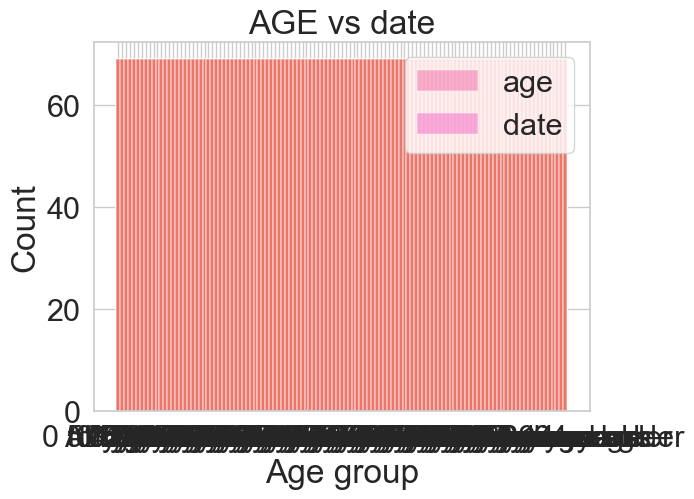

In [14]:
    sns.histplot(data=PE_Wrangled, x='Age group', hue='REF_DATE').set_title("AGE vs date")
    plt.legend(labels=['age', 'date'])
    plt.show()

In [15]:
groups = sorted(PE_Wrangled['Age group'].unique().tolist())
groups

['0 to 14 years',
 '0 to 4 years',
 '0 years',
 '1 year',
 '10 to 14 years',
 '10 years',
 '11 years',
 '12 years',
 '13 years',
 '14 years',
 '15 to 19 years',
 '15 to 64 years',
 '15 years',
 '16 years',
 '17 years',
 '18 years',
 '19 years',
 '2 years',
 '20 to 24 years',
 '20 years',
 '21 years',
 '22 years',
 '23 years',
 '24 years',
 '25 to 29 years',
 '25 years',
 '26 years',
 '27 years',
 '28 years',
 '29 years',
 '3 years',
 '30 to 34 years',
 '30 years',
 '31 years',
 '32 years',
 '33 years',
 '34 years',
 '35 to 39 years',
 '35 years',
 '36 years',
 '37 years',
 '38 years',
 '39 years',
 '4 years',
 '40 to 44 years',
 '40 years',
 '41 years',
 '42 years',
 '43 years',
 '44 years',
 '45 to 49 years',
 '45 years',
 '46 years',
 '47 years',
 '48 years',
 '49 years',
 '5 to 9 years',
 '5 years',
 '50 to 54 years',
 '50 years',
 '51 years',
 '52 years',
 '53 years',
 '54 years',
 '55 to 59 years',
 '55 years',
 '56 years',
 '57 years',
 '58 years',
 '59 years',
 '6 years',
 '60 t

In [21]:
age_values = ['20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years',
              '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years',
              '60 to 64 years', '65 to 69 years', '70 to 74 years', '75 to 79 years']
PE_Wrangled = PE_Wrangled[PE_Wrangled['Age group'].isin(age_values)]
PE_Wrangled = PE_Wrangled.reset_index(drop=True)
PE_Wrangled = PE_Wrangled.drop(columns=['Unnamed: 0'])
PE_Wrangled

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
0,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,20 to 24 years,Persons,14642.0
1,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,25 to 29 years,Persons,13039.0
2,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,30 to 34 years,Persons,13631.0
3,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,35 to 39 years,Persons,15269.0
4,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,40 to 44 years,Persons,14961.0
...,...,...,...,...,...,...
18211,2022-01-01,"Victoria, British Columbia",Females,55 to 59 years,Persons,14574.0
18212,2022-01-01,"Victoria, British Columbia",Females,60 to 64 years,Persons,15783.0
18213,2022-01-01,"Victoria, British Columbia",Females,65 to 69 years,Persons,15466.0
18214,2022-01-01,"Victoria, British Columbia",Females,70 to 74 years,Persons,13738.0


In [22]:
PE_Wrangled = PE_Wrangled.drop(PE_Wrangled[PE_Wrangled['Sex'] != 'Both sexes'].index)
PE_Wrangled

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
0,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,20 to 24 years,Persons,14642.0
1,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,25 to 29 years,Persons,13039.0
2,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,30 to 34 years,Persons,13631.0
3,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,35 to 39 years,Persons,15269.0
4,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,40 to 44 years,Persons,14961.0
...,...,...,...,...,...,...
18187,2022-01-01,"Victoria, British Columbia",Both sexes,55 to 59 years,Persons,28203.0
18188,2022-01-01,"Victoria, British Columbia",Both sexes,60 to 64 years,Persons,29948.0
18189,2022-01-01,"Victoria, British Columbia",Both sexes,65 to 69 years,Persons,28684.0
18190,2022-01-01,"Victoria, British Columbia",Both sexes,70 to 74 years,Persons,25530.0


In [24]:
age_groups = {'20-24': ['20 to 24 years'],
              '25-29': ['25 to 29 years'],
              '30-34': ['30 to 34 years'],
              '35-39': ['35 to 39 years'],
              '40-44': ['40 to 44 years'],
              '45-49': ['45 to 49 years'],
              '50-54': ['50 to 54 years'],
              '55-59': ['55 to 59 years'],
              '60-64': ['60 to 64 years'],
              '65-69': ['65 to 69 years'],
              '70-74': ['70 to 74 years'],
              '75-79': ['75 to 79 years']}

grouped_df = pd.DataFrame(columns=['Age group', 'total_count'])
for key in age_groups.keys():
    age_range_list = age_groups[key]
    total_count = PE_Wrangled.loc[PE_Wrangled['Age group'].isin(age_range_list), 'VALUE'].sum()
    grouped_df = grouped_df.append({'Age group': key, 'total_count': total_count}, ignore_index=True)

grouped_df

/var/folders/hk/4gnwgbn96dvb_skqmy4p4qwh0000gn/T/ipykernel_28658/490423799.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'Age group': key, 'total_count': total_count}, ignore_index=True)
/var/folders/hk/4gnwgbn96dvb_skqmy4p4qwh0000gn/T/ipykernel_28658/490423799.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'Age group': key, 'total_count': total_count}, ignore_index=True)
/var/folders/hk/4gnwgbn96dvb_skqmy4p4qwh0000gn/T/ipykernel_28658/490423799.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'Age group': key, 'total_count': total_count}, ignore_index=True)
/var/folders/hk/4gnwgbn96dvb_skqmy4p4qwh0000gn/T/ipyker

,Age group,total_count
0,20-24,33659774.0
1,25-29,35005839.0
2,30-34,34978605.0
3,35-39,35155309.0
4,40-44,35524387.0
5,45-49,35151806.0
6,50-54,33651524.0
7,55-59,30423627.0
8,60-64,25383875.0
9,65-69,20385820.0


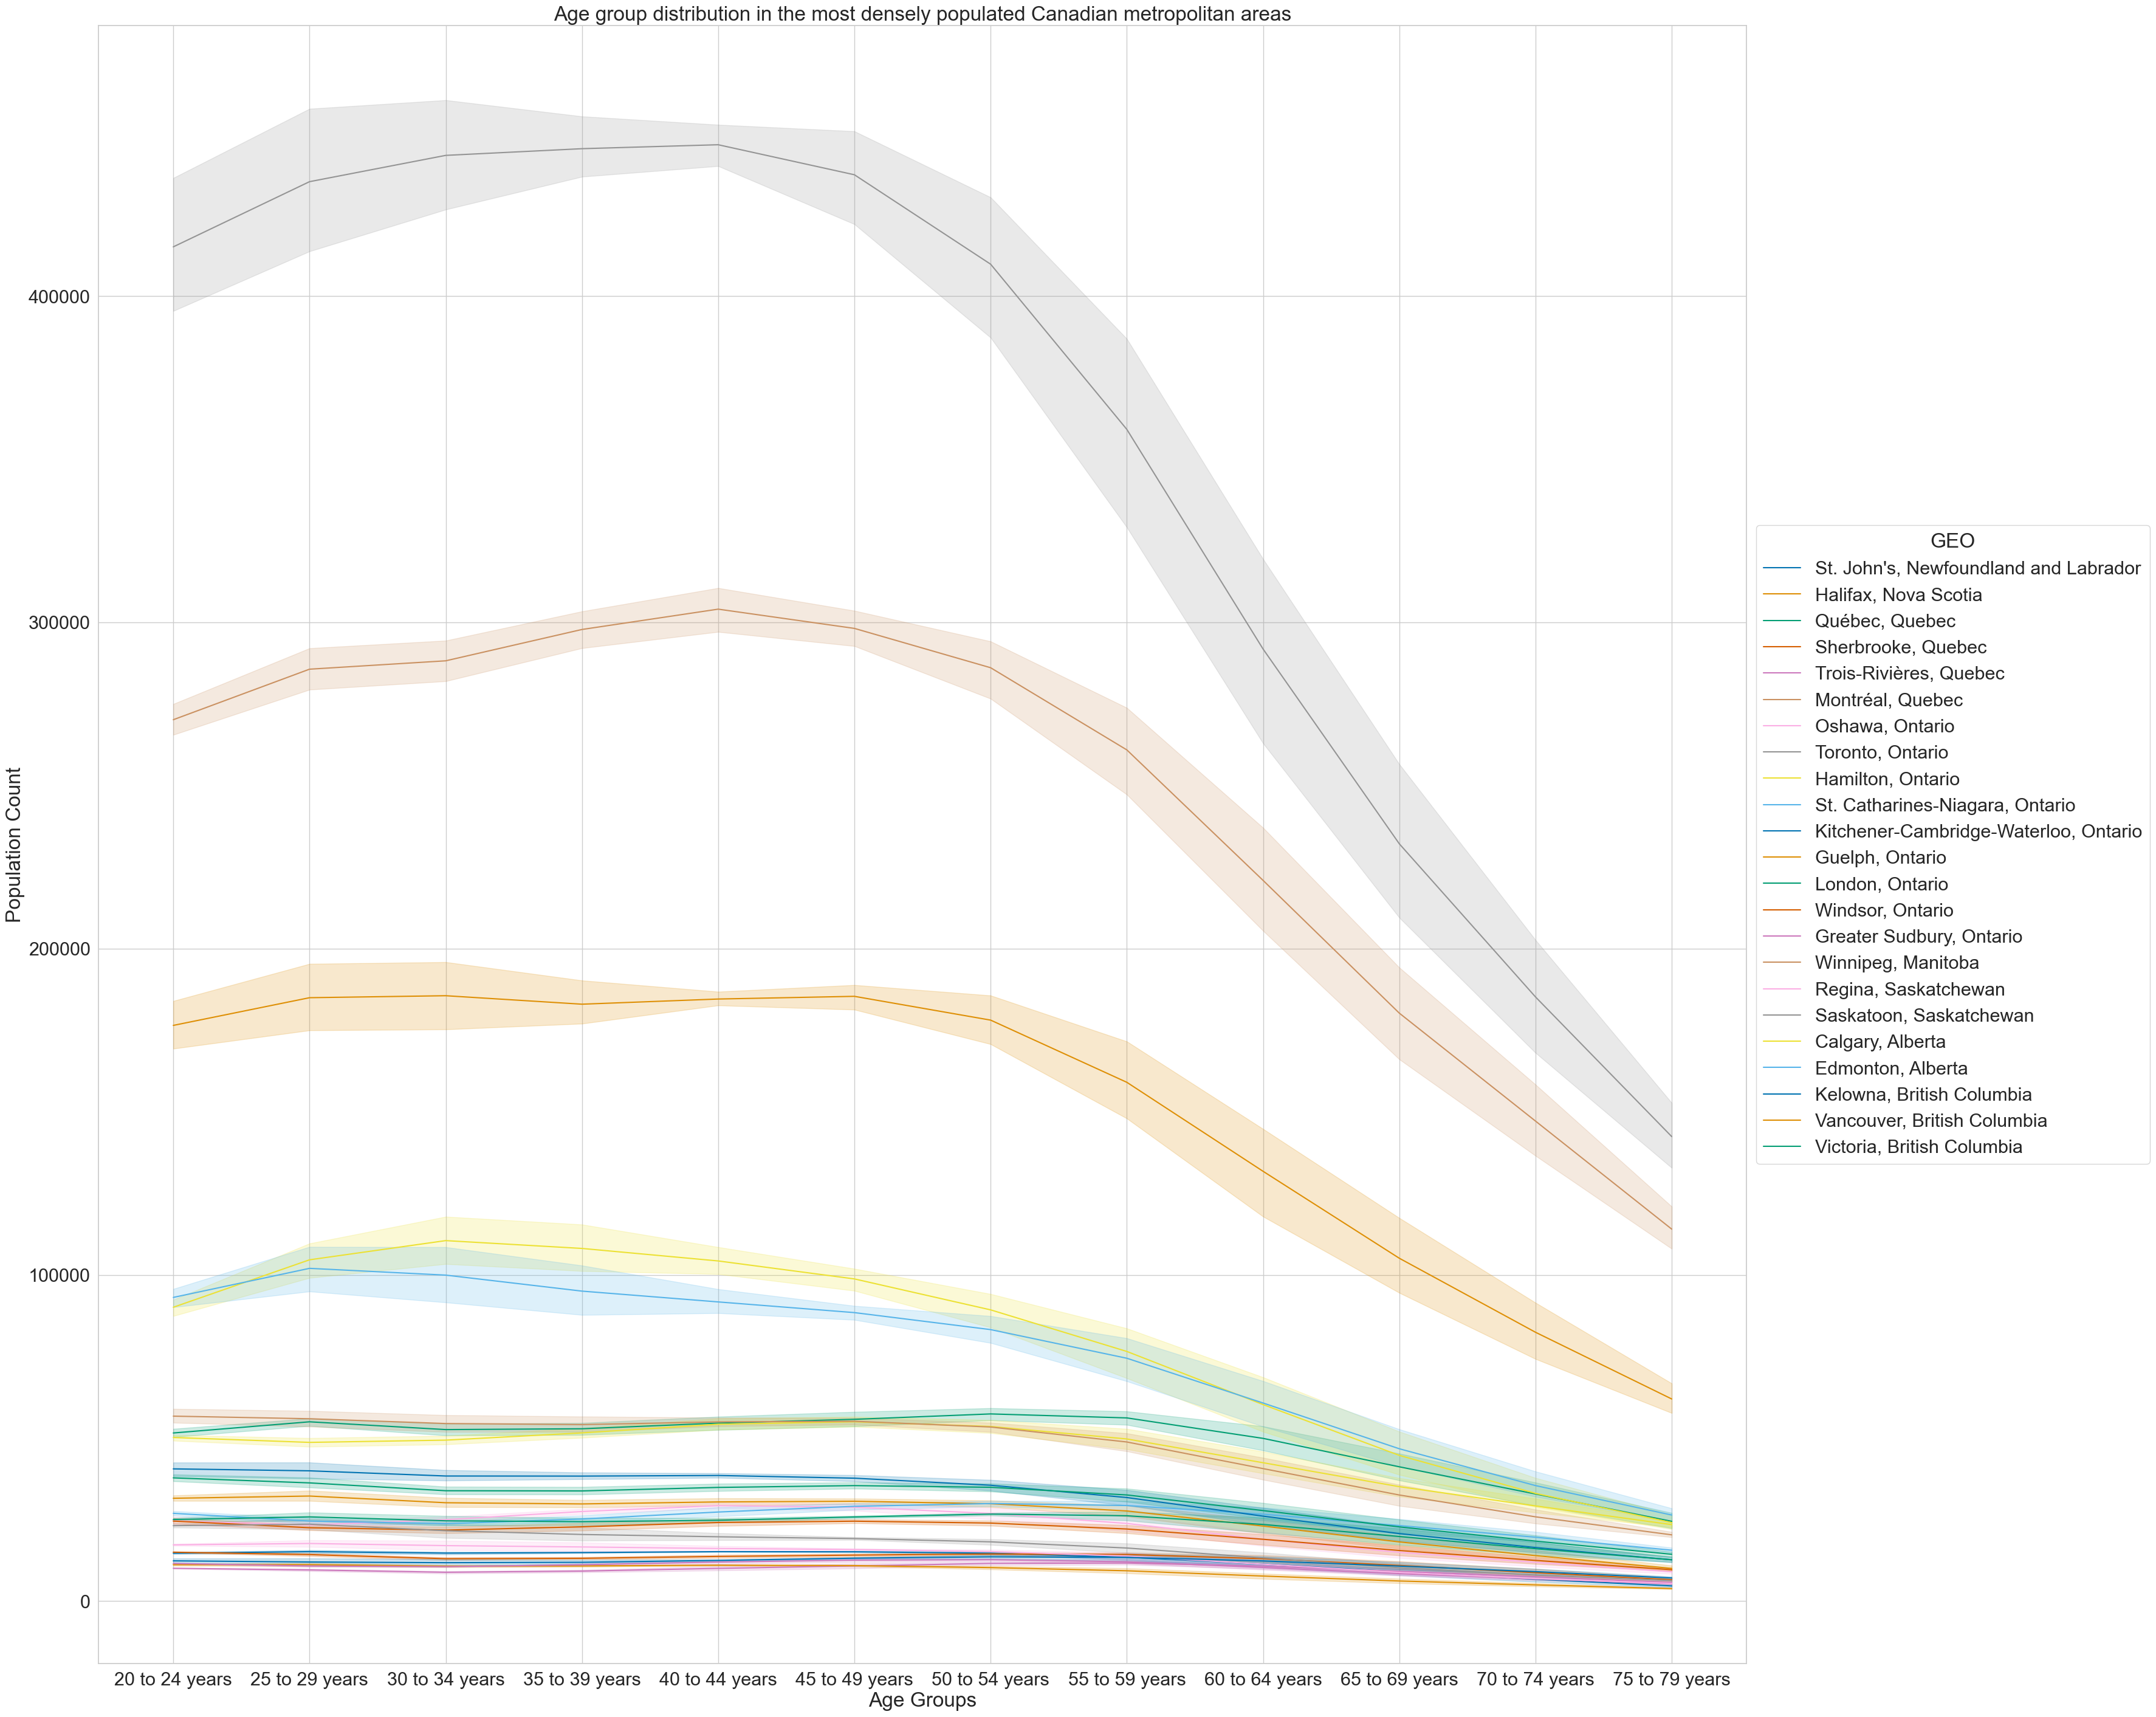

In [25]:

sns.set_style("whitegrid")
plt.figure(figsize=(35,35))

pop = sns.lineplot(x='Age group', y='VALUE', hue='GEO', data=PE_Wrangled, palette='colorblind')

plt.legend(title="GEO", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel("Age Groups")
plt.ylabel("Population Count")
plt.title("Age group distribution in the most densely populated Canadian metropolitan areas")
plt.show()

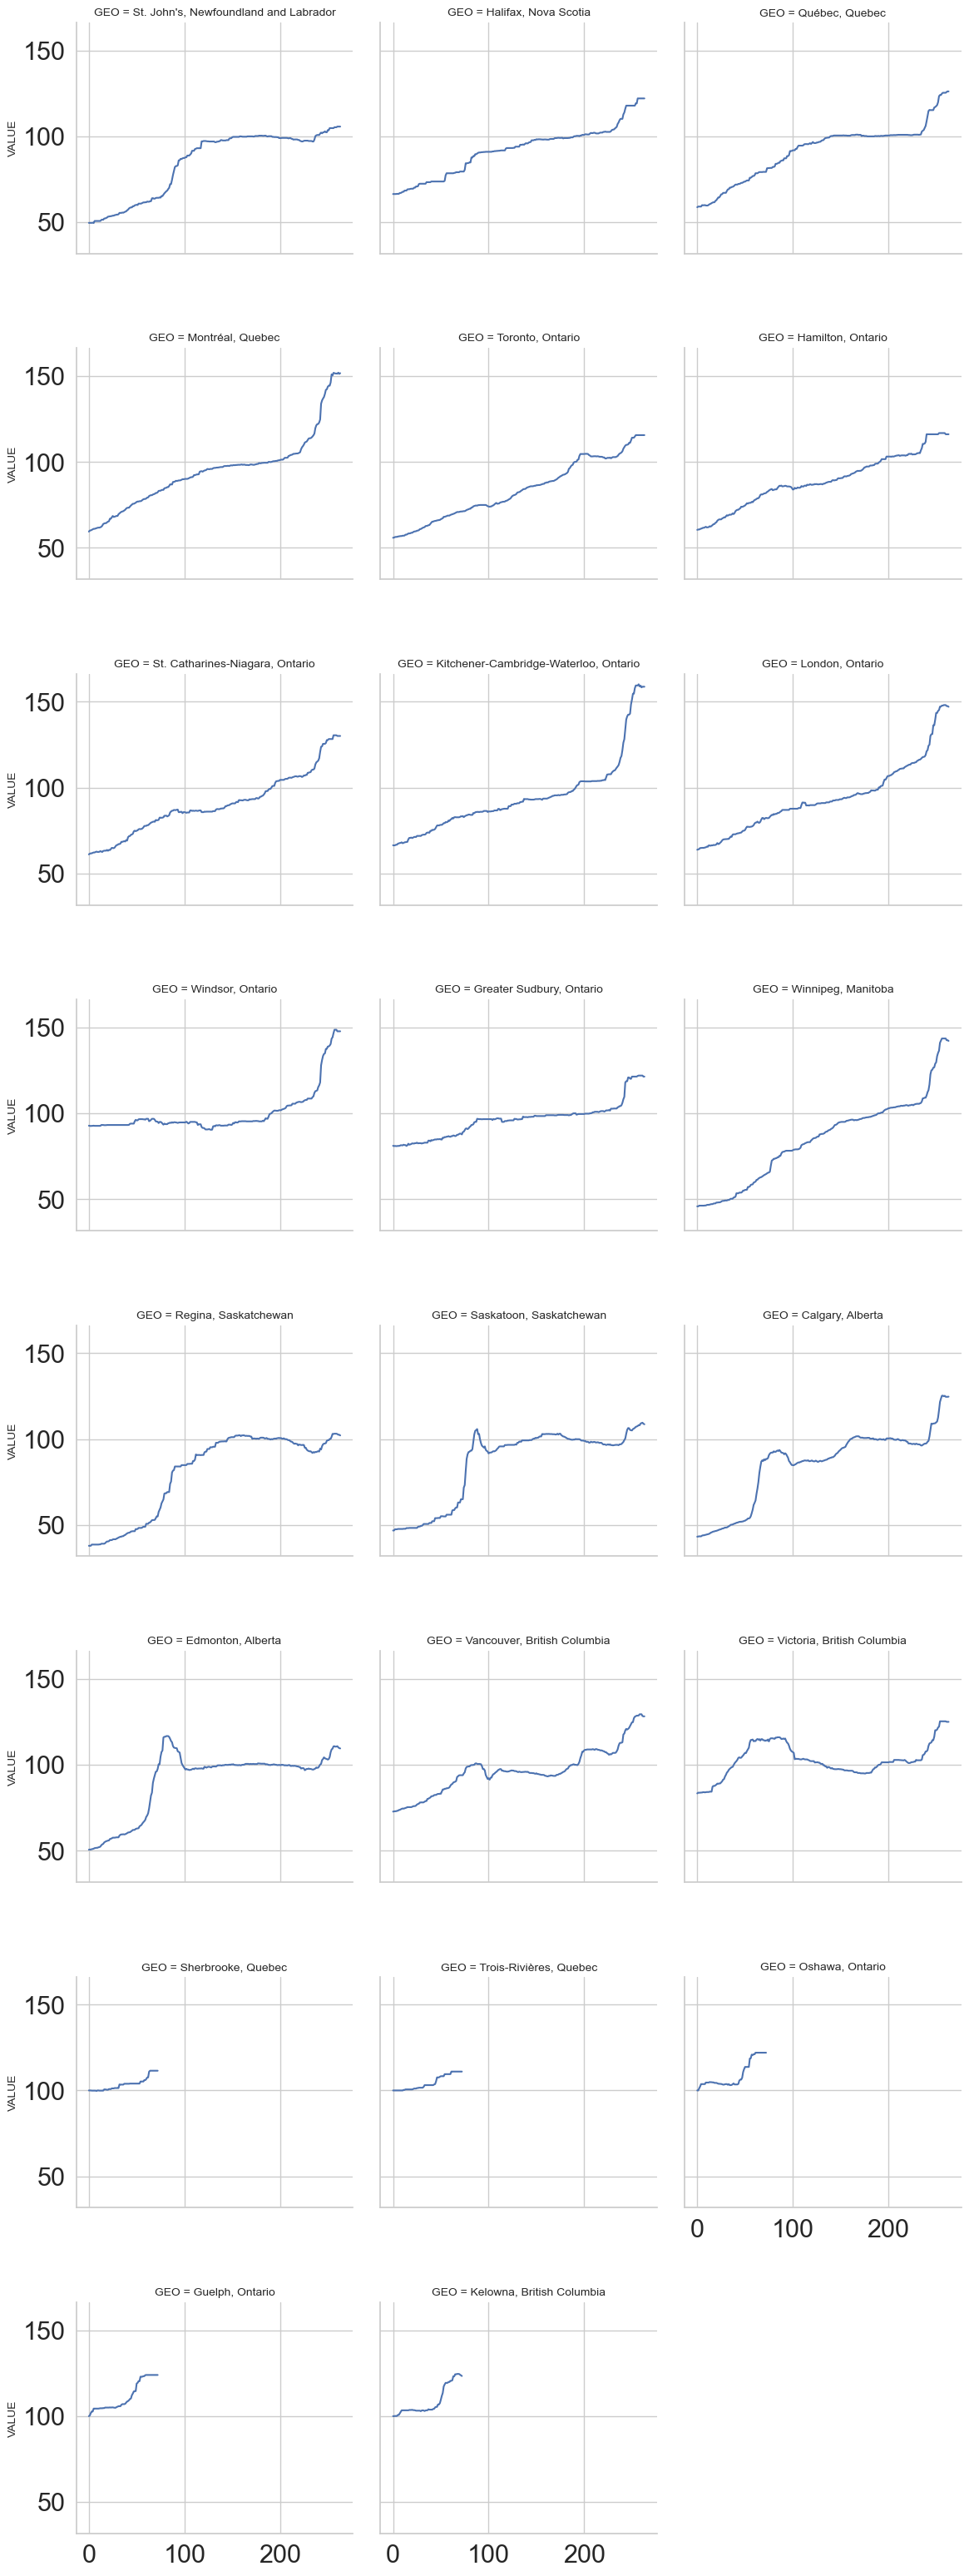

In [26]:
price_facet = sns.FacetGrid(data=NHPI_new_2, col="GEO", col_wrap=3, height=4)
price_facet.map(plt.plot, "VALUE")
price_facet.fig.tight_layout(w_pad=1)
price_facet.set_titles(size=10)
price_facet.set_axis_labels("", "VALUE", size=10)
n=None

From this graph, i can gather that prices increased in all areas. In regards to the last 5 graphs, im not really sure what happened, im thinking that it may have to do with the data set itself because ive tried to rework it many times but im not sure how to alter the x axis.

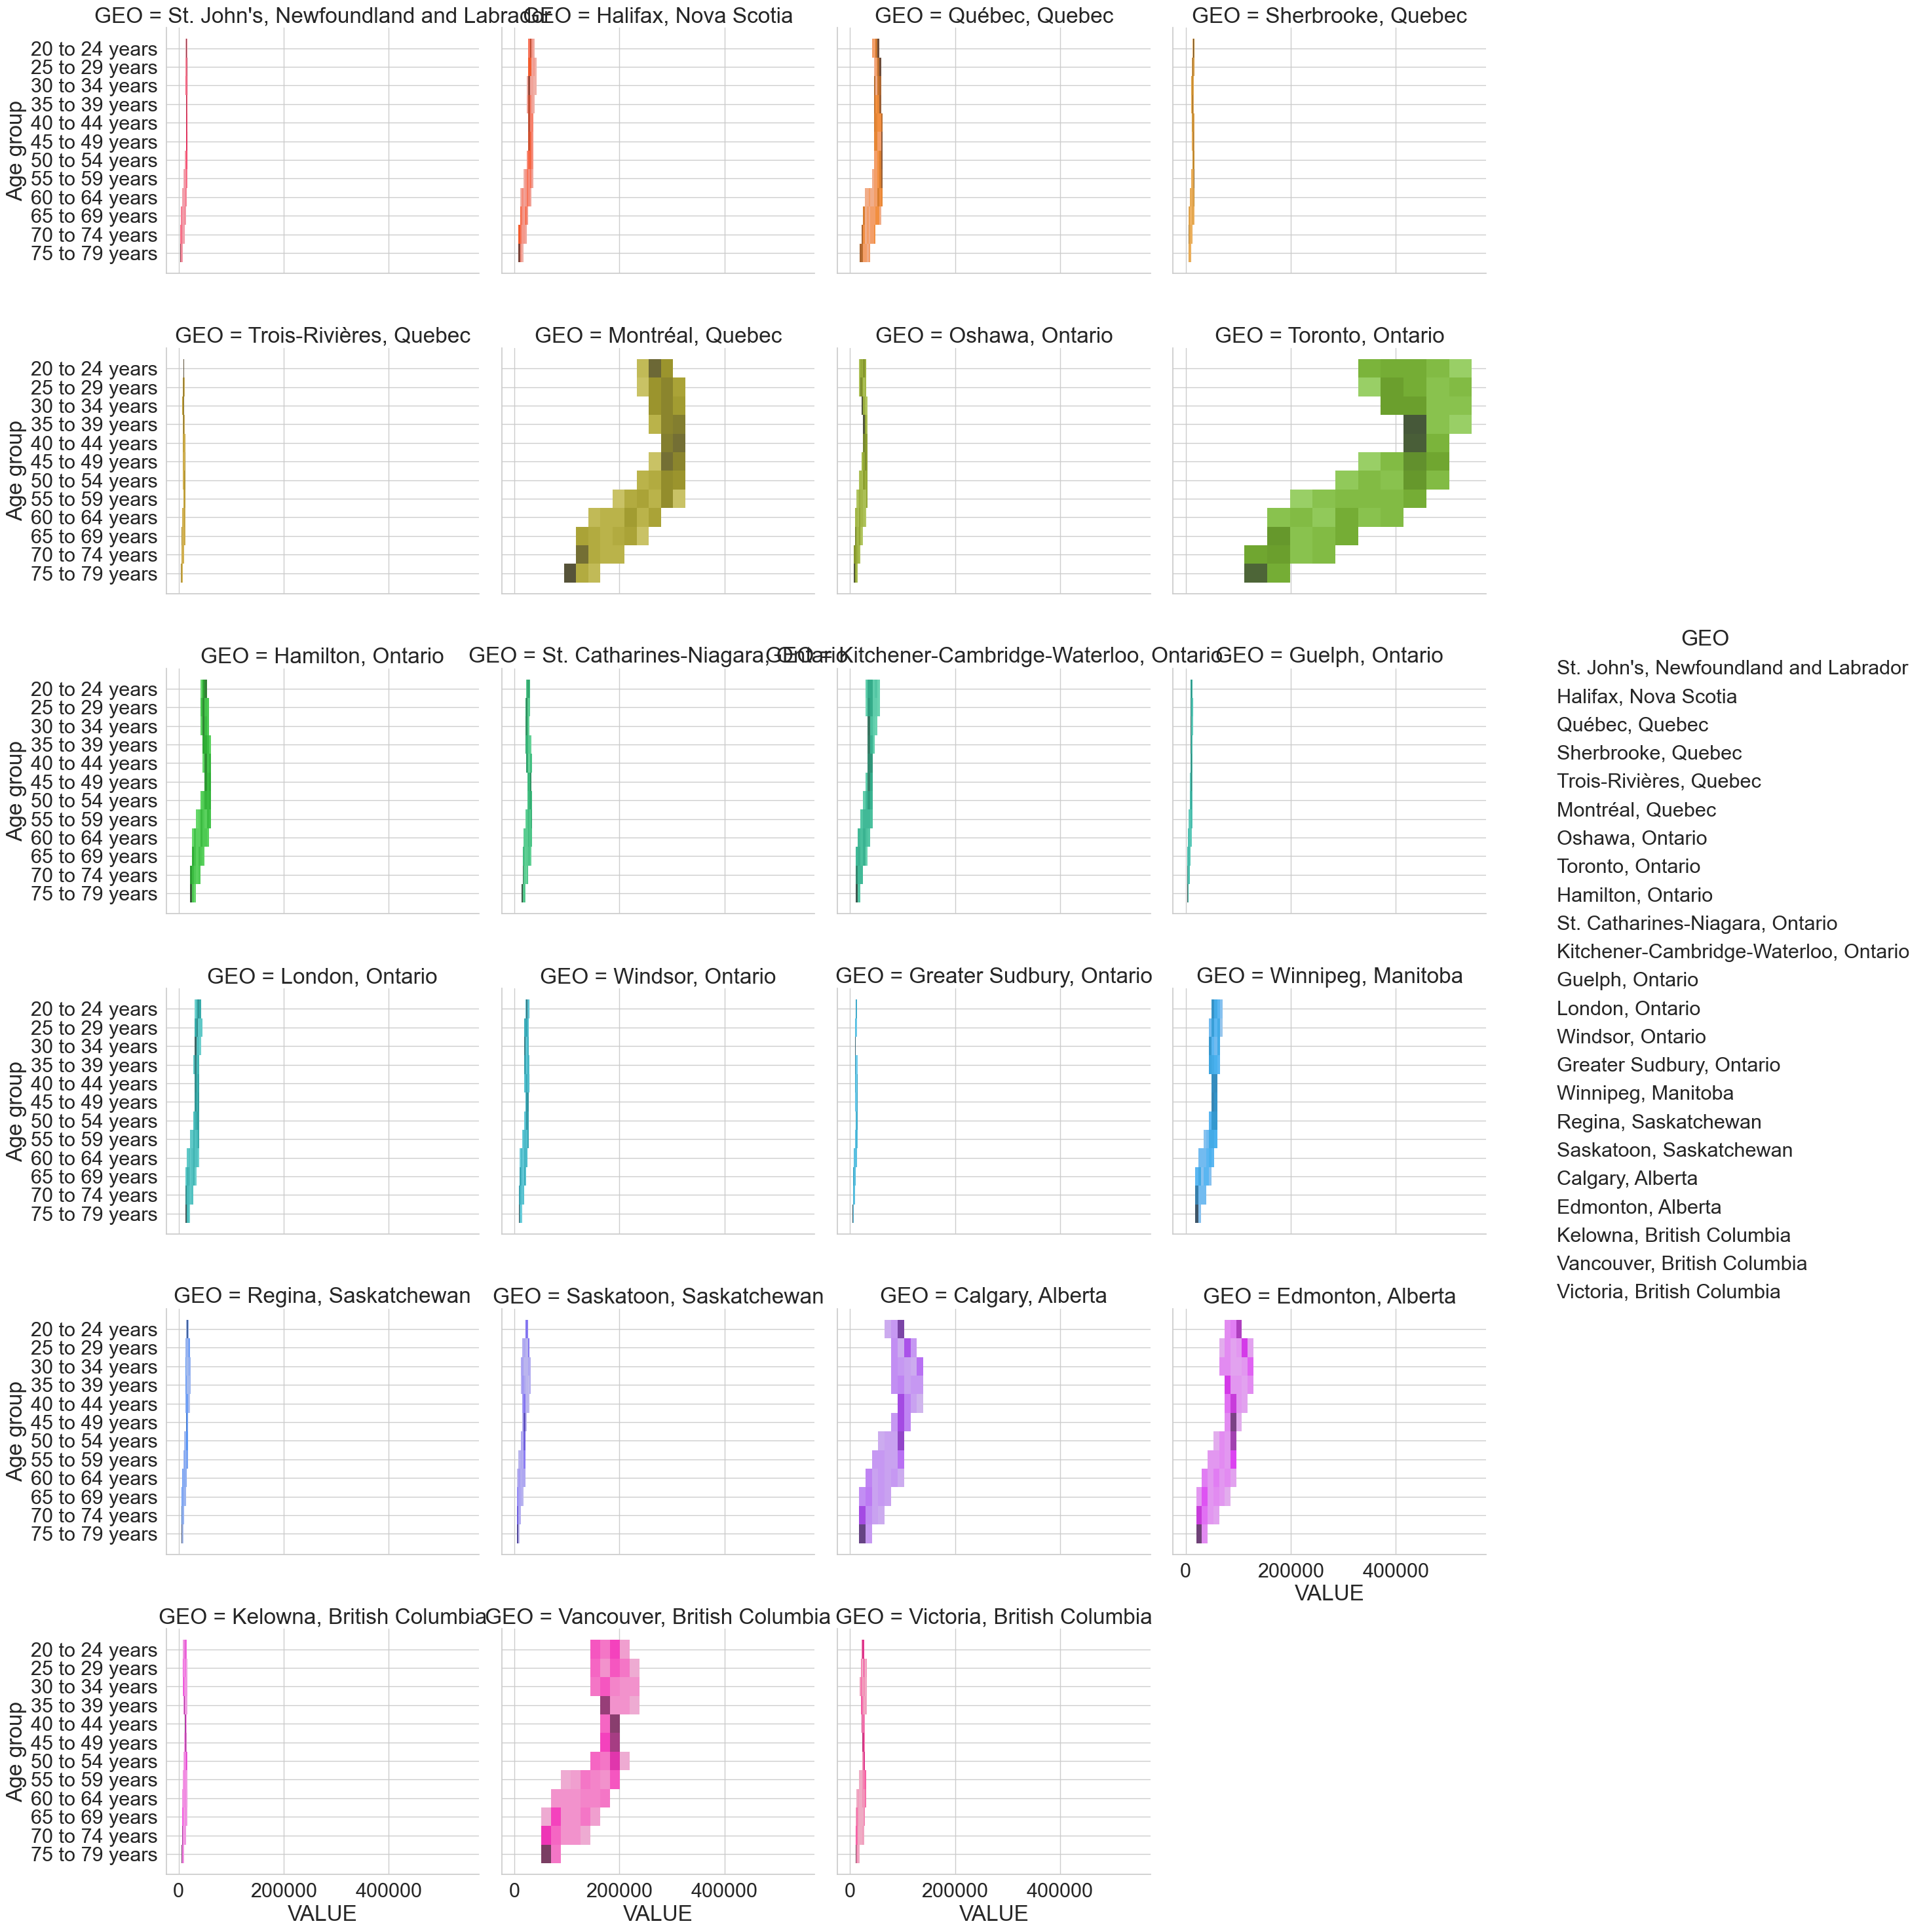

In [43]:
g = sns.FacetGrid(PE_Wrangled, col='GEO', hue='GEO', col_wrap=4, height=5, aspect=1.2)
g.map(sns.histplot, 'VALUE', 'Age group')
g.add_legend()
plt.show()